**Python Data Cleaning and Analysis on an electric car-sharing service company**

**1.0 Importing pandas and Numpy**

In [2]:
# importing pandas library
import pandas as pd

#importing numpy
import numpy as np

**1.1 Loading our Data set Autolib`**

In [3]:
# loading the autolib_DDI_DB dataset
# And familiarize ourselves with the dataframe by viewing its first 10 rows
Autolib_DDI = pd.read_csv('Autolib_dataset.csv' , delimiter=',')
Autolib_DDI.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


**1.2 Accessing Information about our Dataset**

In [4]:
# We count the number of non - missing values in the df dataframe
#the displayed comment and scheduled at have missing values
Autolib_DDI.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [5]:
Autolib_DDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [6]:
# before cleaning our data set
# join the columns year,month,day,hour and minute
# to reduce number of columns
Autolib_DDI['Date'] = pd.to_datetime(Autolib_DDI[['year', 'month', 'day',	'hour',	'minute']])

In [7]:
# preview our dataset
#to view the date column
Autolib_DDI.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00


**1.3 Cleaning our Dataset**

Let us perform data cleaning procedures below providing a documentation for our actions.I will perform as many data cleaning procedures as we think suitable for the various dimensions of data

**Validity**

In [8]:
# Irrelevant data are those that are not actually needed
# dropping the columns year,day,minute and month
# since they are not required for analysis
Autolib_DDI.drop(['year', 'month', 'day', 'minute'] , axis=1 , inplace=True)
Autolib_DDI.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,hour,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,20,2018-04-03 20:14:00


In [9]:
#dropping columns geopoint, scheduled at, displayed comment
Autolib_DDI.drop(['Geo point', 'Displayed comment', 'Scheduled at'] , axis=1, inplace=True)
Autolib_DDI.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00


In [10]:
# dropping column public name
Autolib_DDI.drop(['Public name', 'ID'] , axis=1 , inplace=True)
Autolib_DDI.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,STATION,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,STATION,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,STATION,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00


In [11]:
Autolib_DDI.take(np.random.permutation(len(Autolib_DDI))[:5])

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date
3030,59 boulevard Saint-Jacques,5,5,0,0,0,operational,Paris,STATION,75014,operational,0,station,ok,nonexistent,5,2018-04-02 05:23:00
3762,65 Rue RenÃ© Cros,5,5,0,0,0,nonexistent,Bagneux,STATION,92220,operational,0,station,ok,nonexistent,22,2018-04-02 22:28:00
233,6 Rue Louis Blanc,0,0,0,0,1,operational,Paris,STATION,75010,operational,3,station,ok,nonexistent,14,2018-04-05 14:34:00
2860,37 rue Sainte-Croix de la Bretonnerie,0,0,0,0,0,nonexistent,Paris,STATION,75004,operational,3,station,ok,nonexistent,4,2018-04-01 04:40:00
1729,15 rue Olier,4,4,0,2,0,operational,Paris,STATION,75015,operational,0,station,ok,nonexistent,0,2018-04-03 00:41:00


In [12]:
#drop column cars 
Autolib_DDI.drop(['Cars'] , axis=1 , inplace=True)
Autolib_DDI

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,STATION,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,STATION,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,STATION,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,STATION,75013,operational,2,station,ok,nonexistent,4,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,PARKING,75017,operational,3,station,ok,nonexistent,17,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,STATION,92700,operational,3,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,STATION,75015,operational,2,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,STATION,75007,operational,4,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,STATION,94120,operational,3,station,ok,nonexistent,17,2018-04-04 17:27:00


**Accuracy**

accuracy for bluecar counter

In [13]:
# cheking for accuracy in bluecar counter
#since it should range between 0 and 7
bluecar = Autolib_DDI[(Autolib_DDI['Bluecar counter']  > 7) | (Autolib_DDI['Bluecar counter'] < 0)]
bluecar

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


In [14]:
bluecar.count()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

accuracy for utilib counter

In [15]:
# should be in the range between 0 and 4
utilib = Autolib_DDI[(Autolib_DDI['Utilib counter'] > 4) | (Autolib_DDI['Utilib counter'] < 0)]
utilib

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


In [16]:
utilib.count()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

accuracy for Utilib 1.4 counter

In [17]:
#should range between 0 and 5
utilib_1 = Autolib_DDI[(Autolib_DDI['Utilib 1.4 counter'] > 5) | (Autolib_DDI['Utilib 1.4 counter'] < 0)]
utilib_1

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


In [18]:
utilib_1.count()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

accuracy for charge slots

In [19]:
# should range between 0 and 3
charge_slots = Autolib_DDI[(Autolib_DDI['Charge Slots'] > 3) | (Autolib_DDI['Charge Slots'] < 0)]
charge_slots

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


In [20]:
charge_slots.count()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

accuracy for slots

In [21]:
# should range between 0 and 7
slots = Autolib_DDI[(Autolib_DDI['Slots'] > 7) | (Autolib_DDI['Slots'] < 0)]
slots

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


In [22]:
slots.count()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

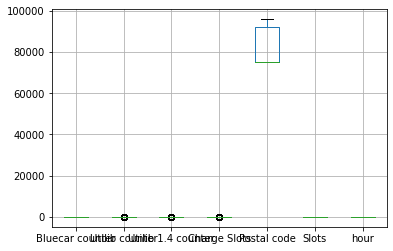

In [39]:
# could also check for outliers for more accurate data
Autolib_DDI.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9f50b2080>,
      dtype=object)

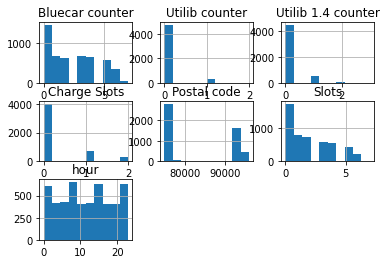

In [40]:
Autolib_DDI.hist()

**Completeness**

In [23]:
# checking for any missing values in our dataset
Autolib_DDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Bluecar counter      5000 non-null   int64         
 2   Utilib counter       5000 non-null   int64         
 3   Utilib 1.4 counter   5000 non-null   int64         
 4   Charge Slots         5000 non-null   int64         
 5   Charging Status      5000 non-null   object        
 6   City                 5000 non-null   object        
 7   Kind                 5000 non-null   object        
 8   Postal code          5000 non-null   int64         
 9   Rental status        5000 non-null   object        
 10  Slots                5000 non-null   int64         
 11  Station type         5000 non-null   object        
 12  Status               5000 non-null   object        
 13  Subscription status  5000 non-nul

In [24]:
# counting the number of missing values per column
# there are no missing values
Autolib_DDI.isnull().sum()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Kind                   0
Postal code            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
hour                   0
Date                   0
dtype: int64

**Consistency**

In [25]:
# check for duplicates and if any drop them
Autolib_DDI.duplicated().sum()

0

**Uniformity**

In [26]:
print(Autolib_DDI.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Bluecar counter      5000 non-null   int64         
 2   Utilib counter       5000 non-null   int64         
 3   Utilib 1.4 counter   5000 non-null   int64         
 4   Charge Slots         5000 non-null   int64         
 5   Charging Status      5000 non-null   object        
 6   City                 5000 non-null   object        
 7   Kind                 5000 non-null   object        
 8   Postal code          5000 non-null   int64         
 9   Rental status        5000 non-null   object        
 10  Slots                5000 non-null   int64         
 11  Station type         5000 non-null   object        
 12  Status               5000 non-null   object        
 13  Subscription status  5000 non-nul

In [43]:
Autolib_DDI.dtypes

Address                        object
Bluecar counter                 int64
Utilib counter                  int64
Utilib 1.4 counter              int64
Charge Slots                    int64
Charging Status                object
City                           object
Kind                           object
Postal code                     int64
Rental status                  object
Slots                           int64
Station type                   object
Status                         object
Subscription status            object
hour                            int64
Date                   datetime64[ns]
dtype: object

In [44]:
Autolib_DDI['Kind']

0       STATION
1       STATION
2       STATION
3       STATION
4       PARKING
         ...   
4995    STATION
4996    STATION
4997    STATION
4998    STATION
4999    STATION
Name: Kind, Length: 5000, dtype: object

**Exporting the cleaned data set**

In [27]:
Autolib_DDI.to_csv('Autolib_DDI.csv')

**Answering the questions**

In [28]:
Autolib_DDI.head(3)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,STATION,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,STATION,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,STATION,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00


What is the most popular hour for returning cars?

In [32]:
Autolib_DDI[(Autolib_DDI['Bluecar counter'] > 0) & (Autolib_DDI['hour']!=Autolib_DDI['hour'].max())]
Autolib_DDI['hour'].max()

23

What station is the most popular?

In [33]:
# overall
# at the most popular picking hour
Autolib_DDI[(Autolib_DDI['Station type'] == Autolib_DDI['Station type'].max())]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date
2038,20 Quai de la MÃ©gisserie,0,0,0,0,nonexistent,Paris,CENTER,75001,nonexistent,0,subs_center,closed,broken,2,2018-04-09 02:02:00
3985,20 Quai de la MÃ©gisserie,0,0,0,0,nonexistent,Paris,CENTER,75001,nonexistent,0,subs_center,ok,operational,13,2018-04-02 13:28:00
4053,20 Quai de la MÃ©gisserie,0,0,0,0,nonexistent,Paris,CENTER,75001,nonexistent,0,subs_center,closed,broken,5,2018-04-04 05:01:00


In [34]:
Autolib_DDI[(Autolib_DDI['Station type'] == Autolib_DDI['hour'].max())]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,hour,Date


What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?

In [36]:
postal_code = Autolib_DDI.groupby('Postal code')['Postal code' '', 'Bluecar counter'].sum()
postal_code['Bluecar_rank'] = postal_code['Bluecar counter'].rank(ascending = 1)
postal_code[(postal_code['Bluecar_rank']==postal_code['Bluecar_rank'].max())]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Postal code,Bluecar counter,Bluecar_rank
Postal code,,,
75015,20554110,609,107.0


Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?

In [37]:
# using utilib counter
postal_code = Autolib_DDI.groupby('Postal code')['Postal code' '', 'Utilib counter'].sum()
postal_code['Utilibcounter_rank'] = postal_code['Utilib counter'].rank(ascending = 1)
postal_code[(postal_code['Utilibcounter_rank']==postal_code['Utilibcounter_rank'].max())]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Postal code,Utilib counter,Utilibcounter_rank
Postal code,,,
75015,20554110,20,106.0
75016,17703776,20,106.0
75017,16578757,20,106.0


In [38]:
# using Utilib 1.4 counter
postal_code = Autolib_DDI.groupby('Postal code')['Postal code' '', 'Utilib 1.4 counter'].sum()
postal_code['Utilib1.4counter_rank'] = postal_code['Utilib 1.4 counter'].rank(ascending = 1)
postal_code[(postal_code['Utilib1.4counter_rank']==postal_code['Utilib1.4counter_rank'].max())]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Postal code,Utilib 1.4 counter,Utilib1.4counter_rank
Postal code,,,
75017,16578757,40,107.0
